# Machine Learning - Unsupervised - Hierarchical Cluster

## Dataset = Seed
## https://www.kaggle.com/datasets/bansodesandeep/clean-wheat-seeds-dataset

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

In [2]:
# Import warning library
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data
data_seed = pd.read_csv("seeds_dataset.csv")
data_seed

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)",Unnamed: 8,Unnamed: 9
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,NaN,NaN
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,NaN,NaN
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,NaN,NaN
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,NaN,NaN
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,NaN,NaN
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,NaN,NaN
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,NaN,NaN
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,NaN,NaN


## Data Cleaning

In [4]:
# Check the dataset info
data_seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class (1, 2, 3)          210 non-null    int64  
 8   Unnamed: 8               2 non-null      object 
 9   Unnamed: 9               1 non-null      object 
dtypes: float64(7), int64(1), object(2)
memory usage: 16.5+ KB


In [5]:
# Drop the unwanted columns
data_seed = data_seed.drop(['Unnamed: 8', 'Unnamed: 9'], axis = 1)
data_seed

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [6]:
# Check the null values
data_seed.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of kernel           0
Width of kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
Class (1, 2, 3)            0
dtype: int64

In [7]:
# Statistics of the dataset
data_seed.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


## Data Visualization

<Axes: >

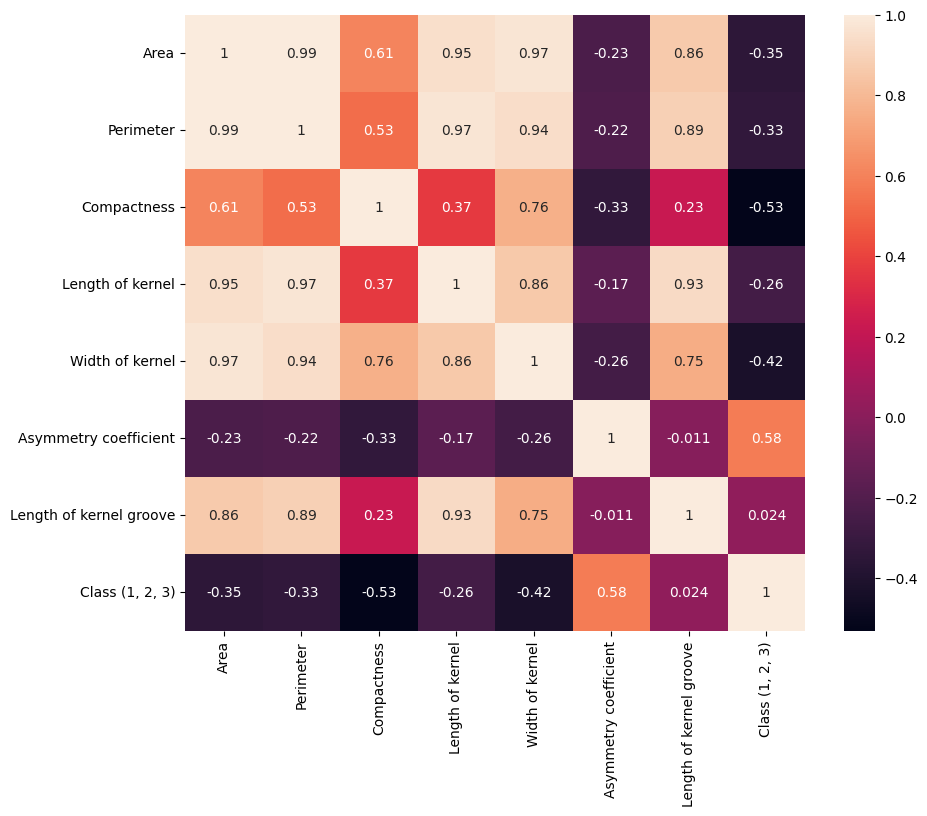

In [8]:
correlation_matrix = data_seed.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True)

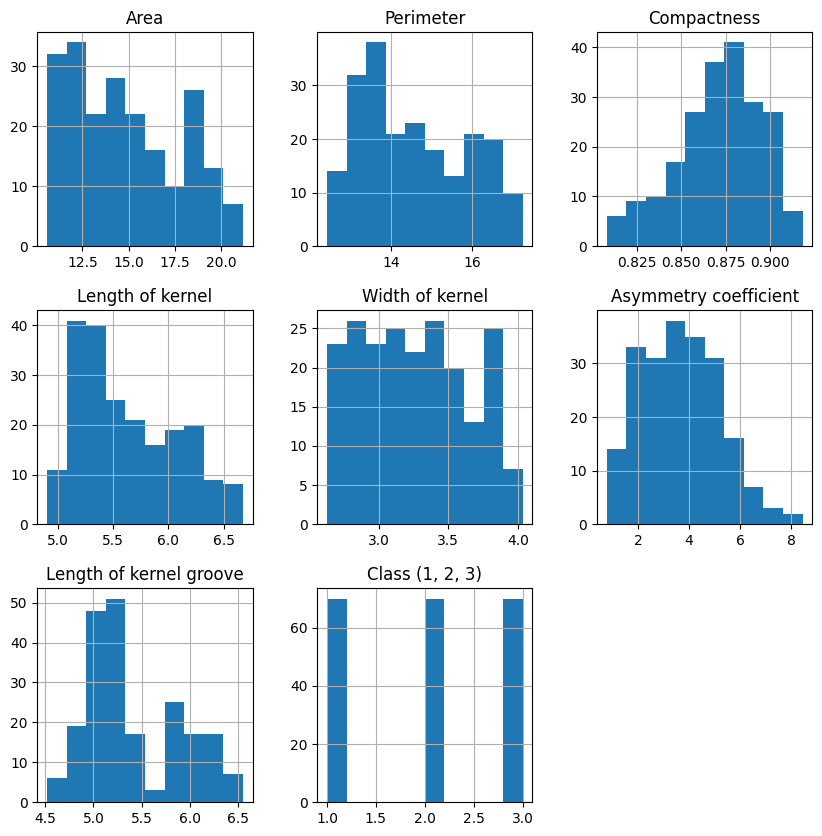

In [9]:
# Distributions for the dataset
data_seed.hist(figsize = (10,10), bins = 10)
plt.title("Histogram for all columns", fontsize = 10)
plt.show()

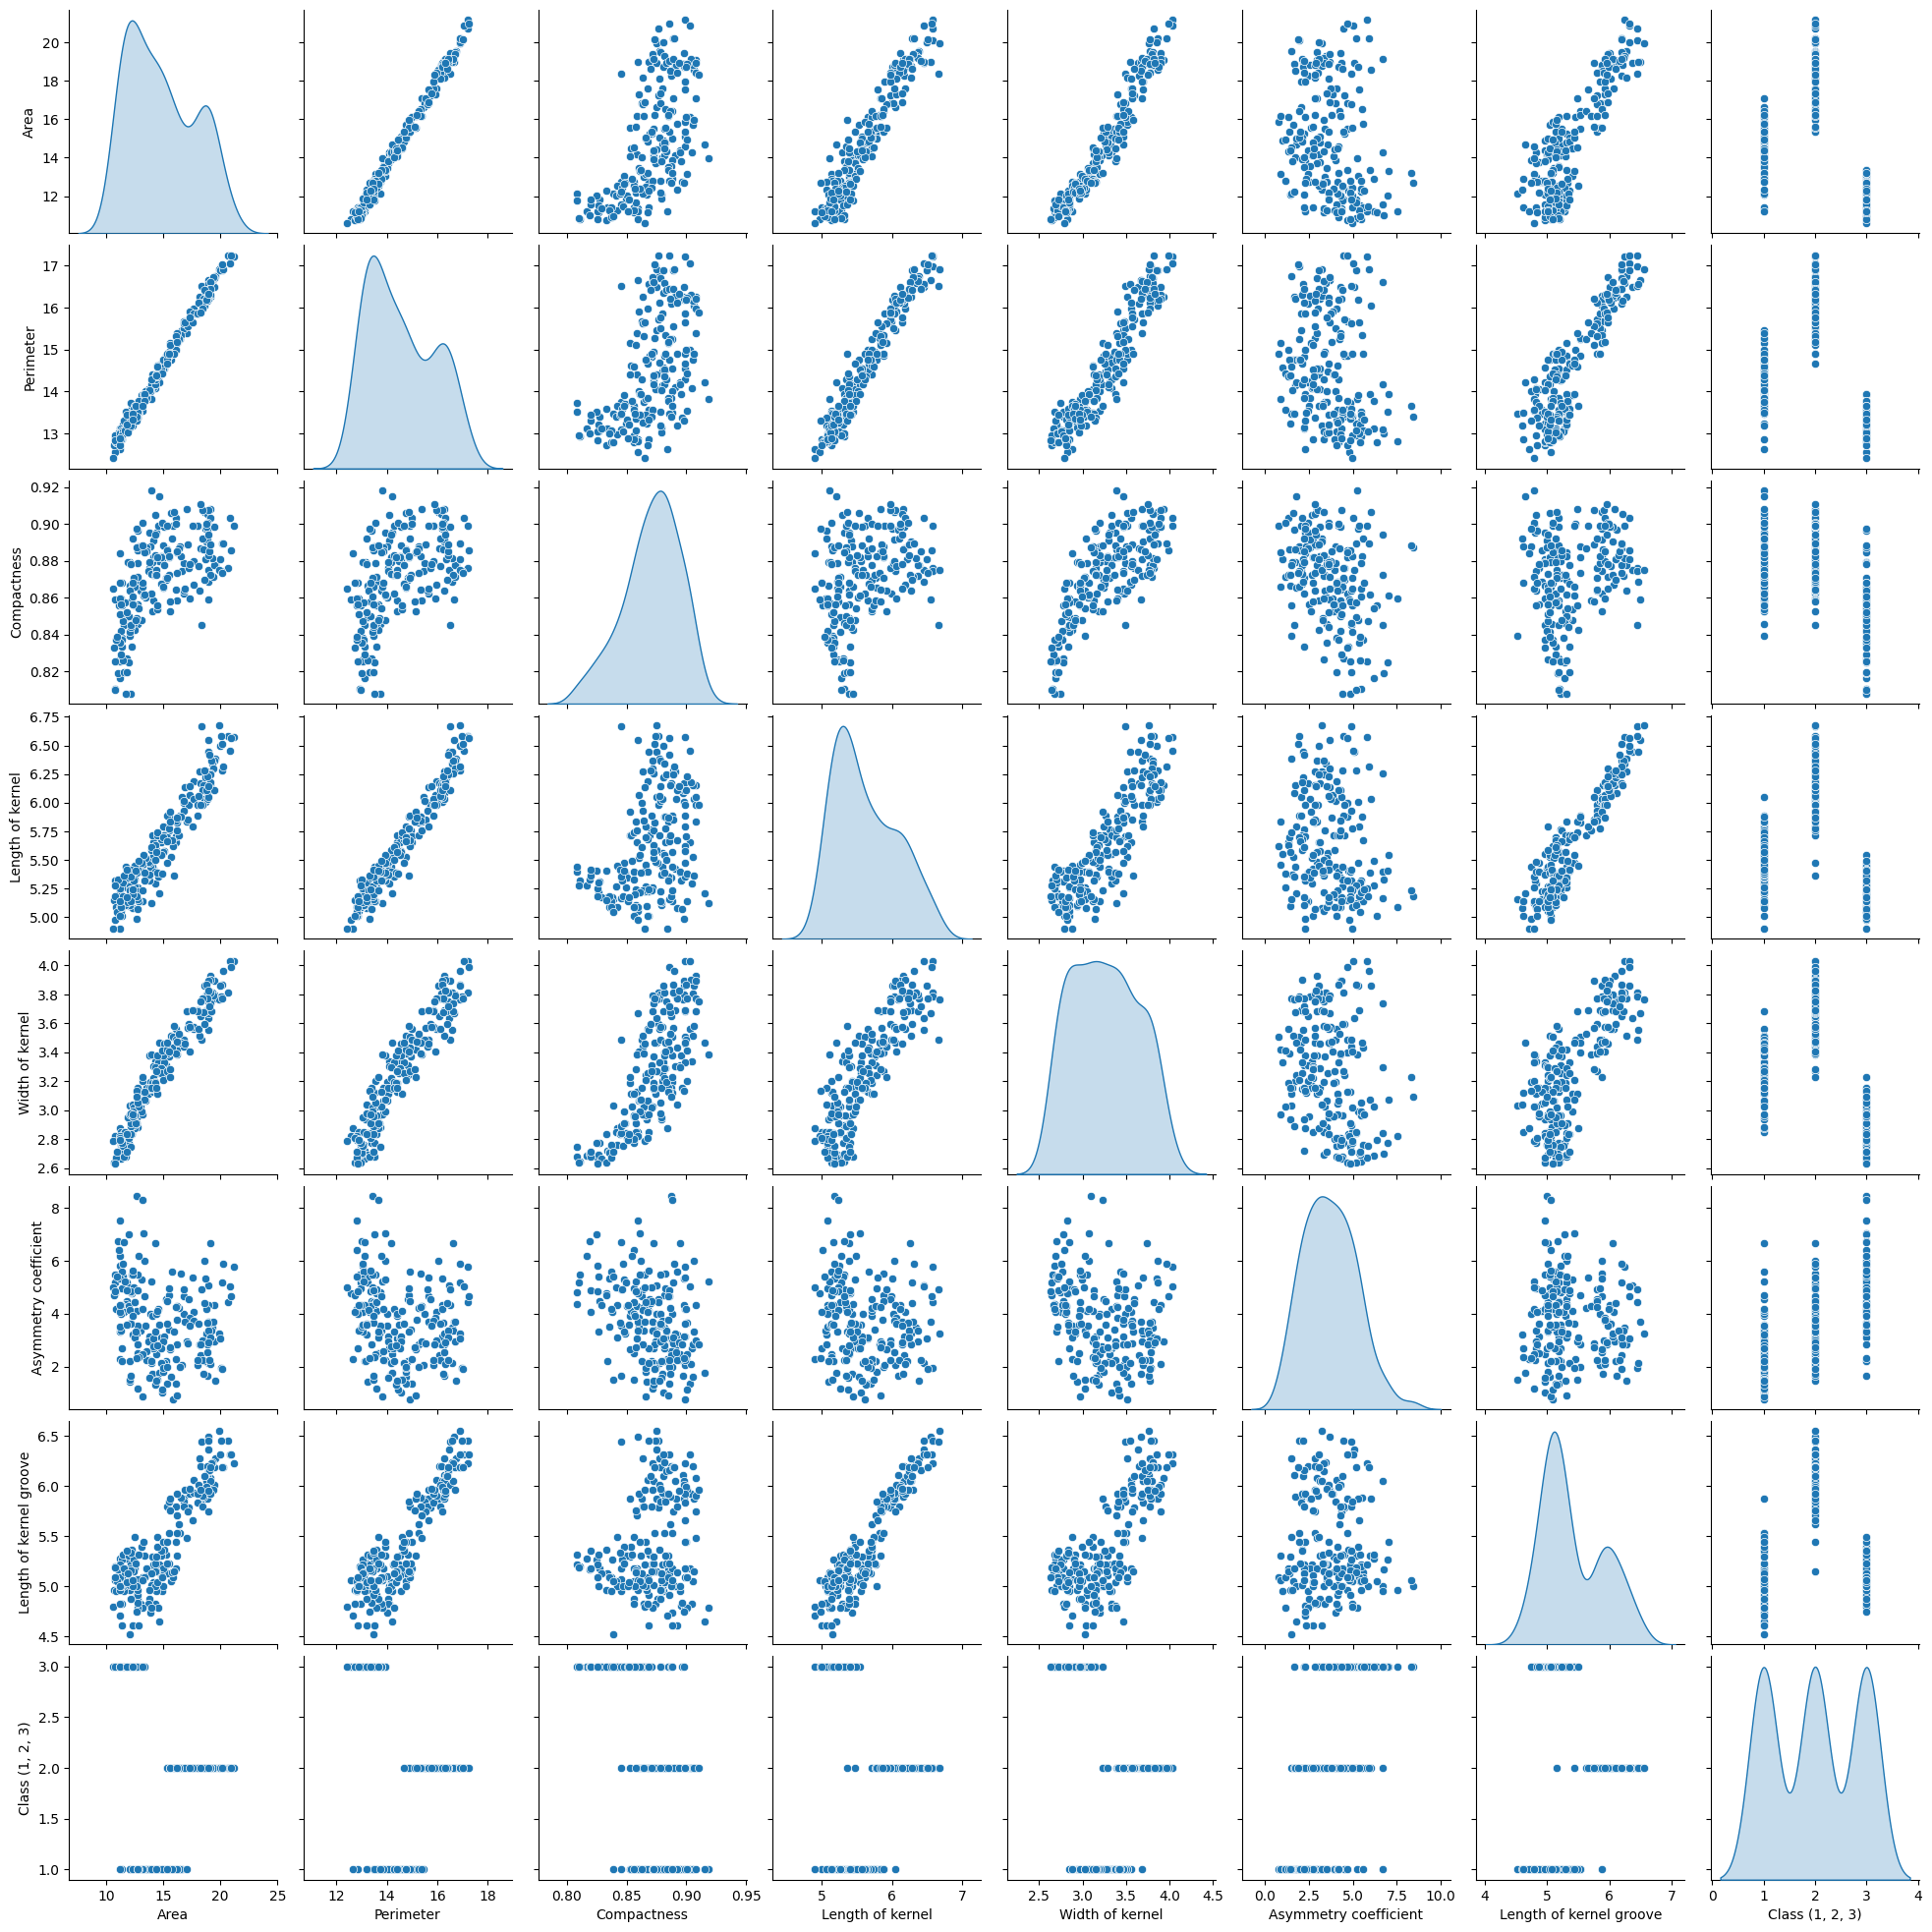

In [10]:
# Pairplots for the dataset
sns.pairplot(data_seed, diag_kind='kde')
plt.show()

In [11]:
data_seed.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [12]:
# Taking the 
x = data_seed[['Length of kernel', 'Class (1, 2, 3)']]
x

,Length of kernel,"Class (1, 2, 3)"
0,5.763,1
1,5.554,1
2,5.291,1
3,5.324,1
4,5.658,1
...,...,...
205,5.137,3
206,5.140,3
207,5.236,3
208,5.175,3


In [13]:
# Standardize the x data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.3042182 , -1.22474487],
       [-0.16862466, -1.22474487],
       [-0.76363745, -1.22474487],
       [-0.68897805, -1.22474487],
       [ 0.06666556, -1.22474487],
       [-0.54870888, -1.22474487],
       [-0.14826301, -1.22474487],
       [-0.47178707, -1.22474487],
       [ 0.96031595, -1.22474487],
       [ 0.57796933, -1.22474487],
       [ 0.1933603 , -1.22474487],
       [-0.43106376, -1.22474487],
       [-0.42880136, -1.22474487],
       [-0.33830512, -1.22474487],
       [-0.3315179 , -1.22474487],
       [-0.62789309, -1.22474487],
       [-1.15277129, -1.22474487],
       [-0.22970963, -1.22474487],
       [-0.95820437, -1.22474487],
       [-0.91069385, -1.22474487],
       [ 0.06666556, -1.22474487],
       [-0.24554647, -1.22474487],
       [-0.02383068, -1.22474487],
       [-1.19801941, -1.22474487],
       [ 0.36304076, -1.22474487],
       [ 0.46258662, -1.22474487],
       [-0.52834722, -1.22474487],
       [-0.52834722, -1.22474487],
       [-0.19803594,

In [15]:
# Length of x_scaled
len(x_scaled)

210

In [16]:
# Computing pairwise distance matrix
distance_matrix = pdist(x_scaled, metric = 'euclidean')

# Convert the 1D distance vector into a 2D square distance matrix
square_dist_matrix = squareform(distance_matrix)

In [17]:
# Display the values
square_dist_matrix

array([[0.        , 0.47284286, 1.06785565, ..., 2.72425231, 2.78741531,
        2.71735851],
       [0.47284286, 0.        , 0.59501279, ..., 2.55295932, 2.59523096,
        2.54854166],
       [1.06785565, 0.59501279, 0.        , ..., 2.45264824, 2.46350853,
        2.45189579],
       ...,
       [2.72425231, 2.55295932, 2.45264824, ..., 0.        , 0.13800677,
        0.01583684],
       [2.78741531, 2.59523096, 2.46350853, ..., 0.13800677, 0.        ,
        0.15384361],
       [2.71735851, 2.54854166, 2.45189579, ..., 0.01583684, 0.15384361,
        0.        ]], shape=(210, 210))

In [18]:
# Check the length of square_dist_matrix array
len(square_dist_matrix)

210

In [20]:
# Print the shape of the array
print(square_dist_matrix.shape)

(210, 210)


In [21]:
# Pair wise distance metrix
dist_df = pd.DataFrame(square_dist_matrix, index = data_seed.index, columns = data_seed.index)
print("\n Pairwise Distance Matrix (simplified):")
print(dist_df.head())


 Pairwise Distance Matrix (simplified):
        0         1         2         3         4         5         6    \
0  0.000000  0.472843  1.067856  0.993196  0.237553  0.852927  0.452481   
1  0.472843  0.000000  0.595013  0.520353  0.235290  0.380084  0.020362   
2  1.067856  0.595013  0.000000  0.074659  0.830303  0.214929  0.615374   
3  0.993196  0.520353  0.074659  0.000000  0.755644  0.140269  0.540715   
4  0.237553  0.235290  0.830303  0.755644  0.000000  0.615374  0.214929   

        7         8         9    ...       200       201       202       203  \
0  0.776005  0.656098  0.273751  ...  2.741303  3.017632  2.984952  2.778823   
1  0.303162  1.128941  0.746594  ...  2.564063  2.768211  2.742320  2.589307   
2  0.291850  1.723953  1.341607  ...  2.454900  2.546058  2.531214  2.461646   
3  0.217191  1.649294  1.266947  ...  2.460982  2.567430  2.551055  2.470174   
4  0.538453  0.893650  0.511304  ...  2.643187  2.885343  2.855855  2.674857   

        204       205      

In [22]:
# Display the dist_df dataframe
dist_df

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,0.000000,0.472843,1.067856,0.993196,0.237553,0.852927,0.452481,0.776005,0.656098,0.273751,...,2.741303,3.017632,2.984952,2.778823,2.756706,2.829454,2.826063,2.724252,2.787415,2.717359
1,0.472843,0.000000,0.595013,0.520353,0.235290,0.380084,0.020362,0.303162,1.128941,0.746594,...,2.564063,2.768211,2.742320,2.589307,2.574299,2.624890,2.622458,2.552959,2.595231,2.548542
2,1.067856,0.595013,0.000000,0.074659,0.830303,0.214929,0.615374,0.291850,1.723953,1.341607,...,2.454900,2.546058,2.531214,2.461646,2.457385,2.474144,2.473198,2.452648,2.463509,2.451896
3,0.993196,0.520353,0.074659,0.000000,0.755644,0.140269,0.540715,0.217191,1.649294,1.266947,...,2.460982,2.567430,2.551055,2.470174,2.464489,2.485757,2.484611,2.457567,2.472577,2.456335
4,0.237553,0.235290,0.830303,0.755644,0.000000,0.615374,0.214929,0.538453,0.893650,0.511304,...,2.643187,2.885343,2.855855,2.674857,2.656125,2.718339,2.715403,2.628977,2.682179,2.623267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2.829454,2.624890,2.474144,2.485757,2.718339,2.513434,2.632277,2.531785,3.208534,2.975930,...,0.185517,0.346148,0.289588,0.104071,0.151581,0.000000,0.006787,0.223978,0.085971,0.239815
206,2.826063,2.622458,2.473198,2.484611,2.715403,2.511922,2.629799,2.530077,3.204155,2.972081,...,0.178730,0.352935,0.296375,0.097283,0.144794,0.006787,0.000000,0.217191,0.079184,0.233028
207,2.724252,2.552959,2.452648,2.457567,2.628977,2.472886,2.558772,2.484611,3.068636,2.854693,...,0.038461,0.570126,0.513566,0.119908,0.072397,0.223978,0.217191,0.000000,0.138007,0.015837
208,2.787415,2.595231,2.463509,2.472577,2.682179,2.495572,2.602029,2.511421,3.153689,2.927962,...,0.099546,0.432120,0.375559,0.018099,0.065610,0.085971,0.079184,0.138007,0.000000,0.153844


In [23]:
# Linkage Metrix
linkage_matrix = linkage(x_scaled, method = 'ward')

# Display the linkage matrix 
linkage_matrix

array([[1.50000000e+01, 4.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.00000000e+00, 2.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.30000000e+01, 5.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.60000000e+01, 2.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [6.30000000e+01, 2.13000000e+02, 0.00000000e+00, 3.00000000e+00],
       [1.27000000e+02, 1.30000000e+02, 0.00000000e+00, 2.00000000e+00],
       [9.30000000e+01, 1.05000000e+02, 0.00000000e+00, 2.00000000e+00],
       [8.20000000e+01, 1.26000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.47000000e+02, 1.62000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.81000000e+02, 1.94000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.07000000e+02, 2.19000000e+02, 0.00000000e+00, 3.00000000e+00],
       [1.43000000e+02, 1.96000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.78000000e+02, 1.93000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.46000000e+02, 1.68000000e+02, 0.00000000e

In [25]:
# Print the shape of linkage_matrix
print(linkage_matrix.shape)

(209, 4)


In [26]:
# Check the length
len(linkage_matrix)

209

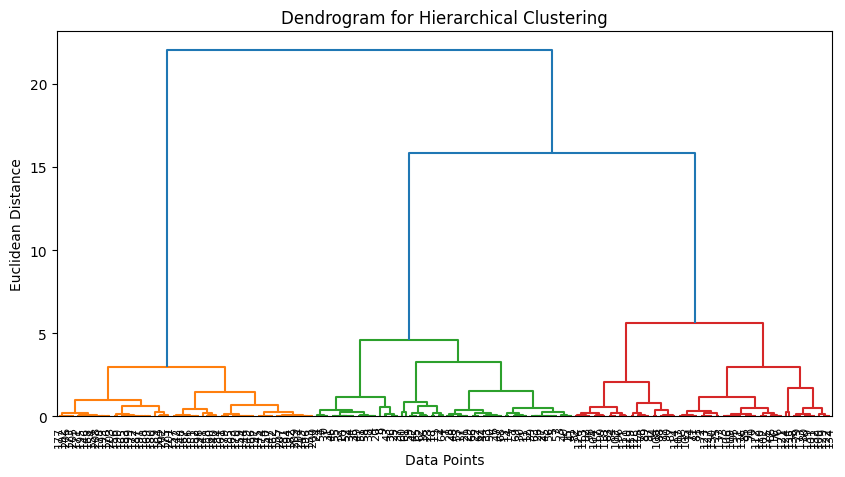

In [24]:
# Plot the Dendrogram with linkage_matrix, labels
plt.figure(figsize = (10,5))
dendrogram(linkage_matrix, labels = data_seed.index, leaf_rotation = 90, leaf_font_size = 8)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [28]:
# Import the library
from sklearn.cluster import AgglomerativeClustering

# Define the AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = "ward")
data_seed['Hierarchical_Cluster'] = hierarchical_cluster.fit_predict(x_scaled)

# Display
hierarchical_cluster

,"n_clusters n_clusters: int or None, default=2The number of clusters to find. It must be ``None`` if``distance_threshold`` is not ``None``.",5
,"metric metric: str or callable, default=""euclidean""Metric used to compute the linkage. Can be ""euclidean"", ""l1"", ""l2"",""manhattan"", ""cosine"", or ""precomputed"". If linkage is ""ward"", only""euclidean"" is accepted. If ""precomputed"", a distance matrix is neededas input for the fit method. If connectivity is None, linkage is""single"" and affinity is not ""precomputed"" any valid pairwise distancemetric can be assigned.For an example of agglomerative clustering with different metrics, see:ref:`sphx_glr_auto_examples_cluster_plot_agglomerative_clustering_metrics.py`... versionadded:: 1.2",'euclidean'
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the output of the computation of the tree.By default, no caching is done. If a string is given, it is thepath to the caching directory.",None
,"connectivity connectivity: array-like, sparse matrix, or callable, default=NoneConnectivity matrix. Defines for each sample the neighboringsamples following a given structure of the data.This can be a connectivity matrix itself or a callable that transformsthe data into a connectivity matrix, such as derived from`kneighbors_graph`. Default is ``None``, i.e, thehierarchical clustering algorithm is unstructured.For an example of connectivity matrix using:class:`~sklearn.neighbors.kneighbors_graph`, see:ref:`sphx_glr_auto_examples_cluster_plot_ward_structured_vs_unstructured.py`.",None
,"compute_full_tree compute_full_tree: 'auto' or bool, default='auto'Stop early the construction of the tree at ``n_clusters``. This isuseful to decrease computation time if the number of clusters is notsmall compared to the number of samples. This option is useful onlywhen specifying a connectivity matrix. Note also that when varying thenumber of clusters and using caching, it may be advantageous to computethe full tree. It must be ``True`` if ``distance_threshold`` is not``None``. By default `compute_full_tree` is ""auto"", which is equivalentto `True` when `distance_threshold` is not `None` or that `n_clusters`is inferior to the maximum between 100 or `0.02 * n_samples`.Otherwise, ""auto"" is equivalent to `False`.",'auto'
,"linkage linkage: {'ward', 'complete', 'average', 'single'}, default='ward'Which linkage criterion to use. The linkage criterion determines whichdistance to use between sets of observation. The algorithm will mergethe pairs of cluster that minimize this criterion.- 'ward' minimizes the variance of the clusters being merged.- 'average' uses the average of the distances of each observation of the two sets.- 'complete' or 'maximum' linkage uses the maximum distances between all observations of the two sets.- 'single' uses the minimum of the distances between all observations of the two sets... versionadded:: 0.20 Added the 'single' optionFor examples comparing different `linkage` criteria, see:ref:`sphx_glr_auto_examples_cluster_plot_linkage_comparison.py`.",'ward'
,"distance_threshold distance_threshold: float, default=NoneThe linkage distance threshold at or above which clusters will not bemerged. If not ``None``, ``n_clusters`` must be ``None`` and``compute_full_tree`` must be ``True``... versionadded:: 0.21",None
,"compute_distances compute_distances: bool, default=FalseComputes distances between clusters even if `distance_threshold` is notused. This can be used to make dendrogram visualization, but introducesa computational and memory overhead... versionadded:: 0.24For an example of dendrogram visualization, see:ref:`sphx_glr_auto_examples_cluster_plot_agglomerative_dendrogram.py`.",False


In [31]:
# Display the dataframe
data_seed

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)",Hierarchical_Cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,4
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,4
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,1
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,1
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,1
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,1


In [32]:
data_seed['Hierarchical_Cluster'].unique()

array([4, 0, 2, 3, 1])

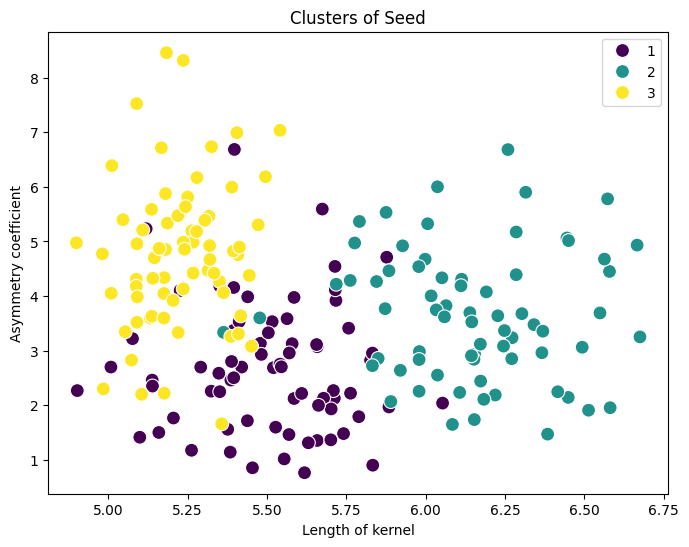

In [30]:
# Plot the Clusters
plt.figure(figsize = (8,6))
sns.scatterplot(data = data_seed, x = 'Length of kernel', y = 'Asymmetry coefficient', hue = 'Class (1, 2, 3)',
                palette = "viridis", s = 100)
plt.title("Clusters of Seed")
plt.xlabel("Length of kernel")
plt.ylabel("Asymmetry coefficient")
plt.legend()
plt.show()